🩺 Tugas Praktikum – Multiple Linear Regression

Dataset: insurance.csv
Tujuan: Memprediksi medical cost berdasarkan beberapa faktor (umur, BMI, jumlah anak, status merokok, jenis kelamin, wilayah).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path ke file
path = '/content/drive/MyDrive/ML/insurance.csv'

# Baca dataset
data = pd.read_csv(path)
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔹 5 Data Teratas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

📘 Deskripsi Variabel:

- age: usia individu
- sex: jenis kelamin (male/female)
- bmi: Body Mass Index (indikator obesitas)
- children: jumlah anak yang ditanggung asuransi
- smoker: status merokok (yes/no)
- region: wilayah tempat tinggal
- charges: total biaya medis (target prediksi)


📊 Evaluasi Model:
R-squared : 0.7836
MSE        : 33596915.85
MAE        : 4181.19


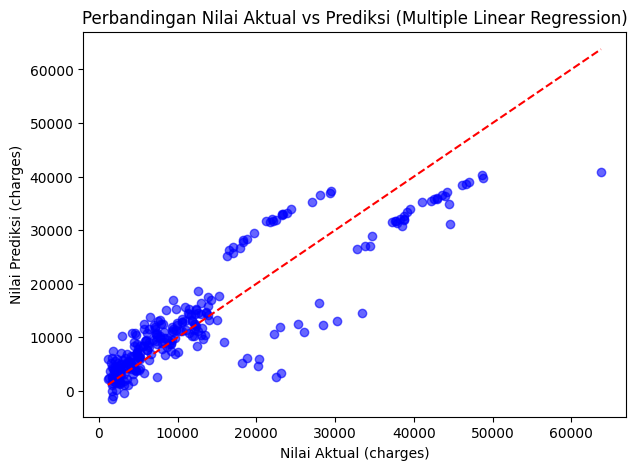


📈 Analisis Singkat:

Nilai R² sebesar 0.7836 menunjukkan bahwa model mampu menjelaskan sekitar 78.36% variasi data biaya medis.
Semakin mendekati 1, semakin baik kemampuan prediksi model.

MSE (Mean Squared Error) dan MAE (Mean Absolute Error) menunjukkan rata-rata besar kesalahan prediksi.
Semakin kecil nilainya, semakin akurat model.

Dari scatter plot, terlihat bahwa sebagian besar titik prediksi mendekati garis diagonal merah,
menandakan model cukup baik dalam memprediksi biaya medis berdasarkan fitur-fitur seperti
usia, BMI, jumlah anak, kebiasaan merokok, jenis kelamin, dan wilayah.



In [ ]:
# ===============================================
# 1️⃣ Import library
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive

# ===============================================
# 2️⃣ Mount Google Drive & Baca Dataset
# ===============================================
drive.mount('/content/drive')

path = '/content/drive/MyDrive/ML/insurance.csv'
data = pd.read_csv(path)

print("🔹 5 Data Teratas:")
print(data.head(), "\n")

# ===============================================
# 3️⃣ Deskripsi Dataset
# ===============================================
print("📘 Deskripsi Variabel:")
print("""
- age: usia individu
- sex: jenis kelamin (male/female)
- bmi: Body Mass Index (indikator obesitas)
- children: jumlah anak yang ditanggung asuransi
- smoker: status merokok (yes/no)
- region: wilayah tempat tinggal
- charges: total biaya medis (target prediksi)
""")

# ===============================================
# 4️⃣ Pisahkan Fitur (X) dan Target (y)
# ===============================================
X = data.drop('charges', axis=1)
y = data['charges']

# ===============================================
# 5️⃣ Encoding Data Kategorikal
# ===============================================
categorical_features = ['sex', 'smoker', 'region']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'
)

X = ct.fit_transform(X)

# ===============================================
# 6️⃣ Split Data Train & Test
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================================
# 7️⃣ Buat & Latih Model Multiple Linear Regression
# ===============================================
model = LinearRegression()
model.fit(X_train, y_train)

# ===============================================
# 8️⃣ Prediksi Data Uji
# ===============================================
y_pred = model.predict(X_test)

# ===============================================
# 9️⃣ Evaluasi Model
# ===============================================
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Evaluasi Model:")
print(f"R-squared : {r2:.4f}")
print(f"MSE        : {mse:.2f}")
print(f"MAE        : {mae:.2f}")

# ===============================================
# 🔟 Visualisasi: Aktual vs Prediksi
# ===============================================
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Nilai Aktual (charges)")
plt.ylabel("Nilai Prediksi (charges)")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Multiple Linear Regression)")
plt.show()

# ===============================================
# 11️⃣ Analisis Hasil
# ===============================================
print("\n📈 Analisis Singkat:")
print(f"""
Nilai R² sebesar {r2:.4f} menunjukkan bahwa model mampu menjelaskan sekitar {r2*100:.2f}% variasi data biaya medis.
Semakin mendekati 1, semakin baik kemampuan prediksi model.

MSE (Mean Squared Error) dan MAE (Mean Absolute Error) menunjukkan rata-rata besar kesalahan prediksi.
Semakin kecil nilainya, semakin akurat model.

Dari scatter plot, terlihat bahwa sebagian besar titik prediksi mendekati garis diagonal merah,
menandakan model cukup baik dalam memprediksi biaya medis berdasarkan fitur-fitur seperti
usia, BMI, jumlah anak, kebiasaan merokok, jenis kelamin, dan wilayah.
""")
